# **Problem Statement**

## **Implement a KNN model to classify the animals into categories**

In [216]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split
import warnings
warnings.filterwarnings('ignore')

In [217]:
from google.colab import files
uploded=files.upload()

Saving Zoo.csv to Zoo (4).csv


In [218]:
zoo =pd.read_csv('Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [219]:
zoo.isnull().any()

animal name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
type           False
dtype: bool

In [220]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [221]:
#Descriptive statistics
zoo.shape

(101, 18)

In [222]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [223]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [224]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [225]:
zoo['type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [226]:
list(zoo)

['animal name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

# **Data visualization**

<Axes: >

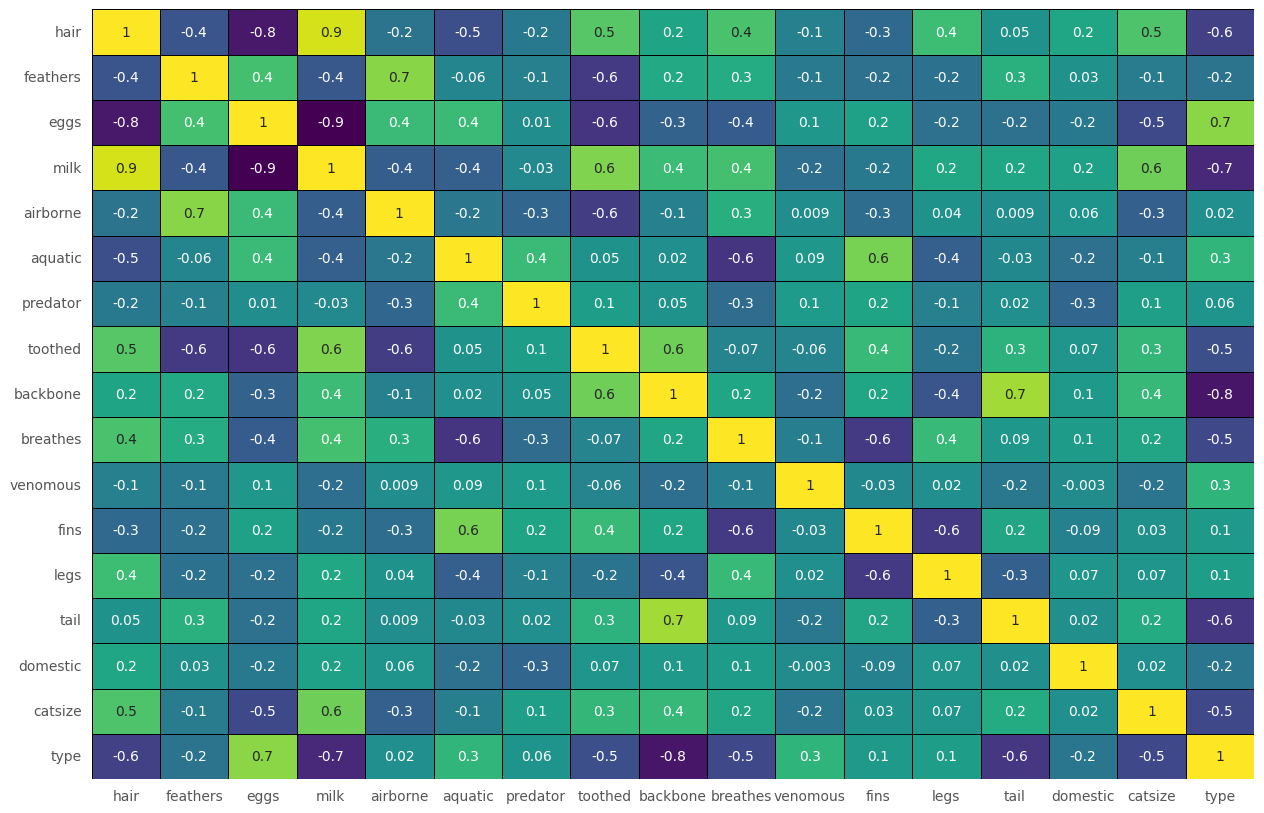

In [227]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(zoo.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

Text(0.5, 1.0, 'Features for the Animals')

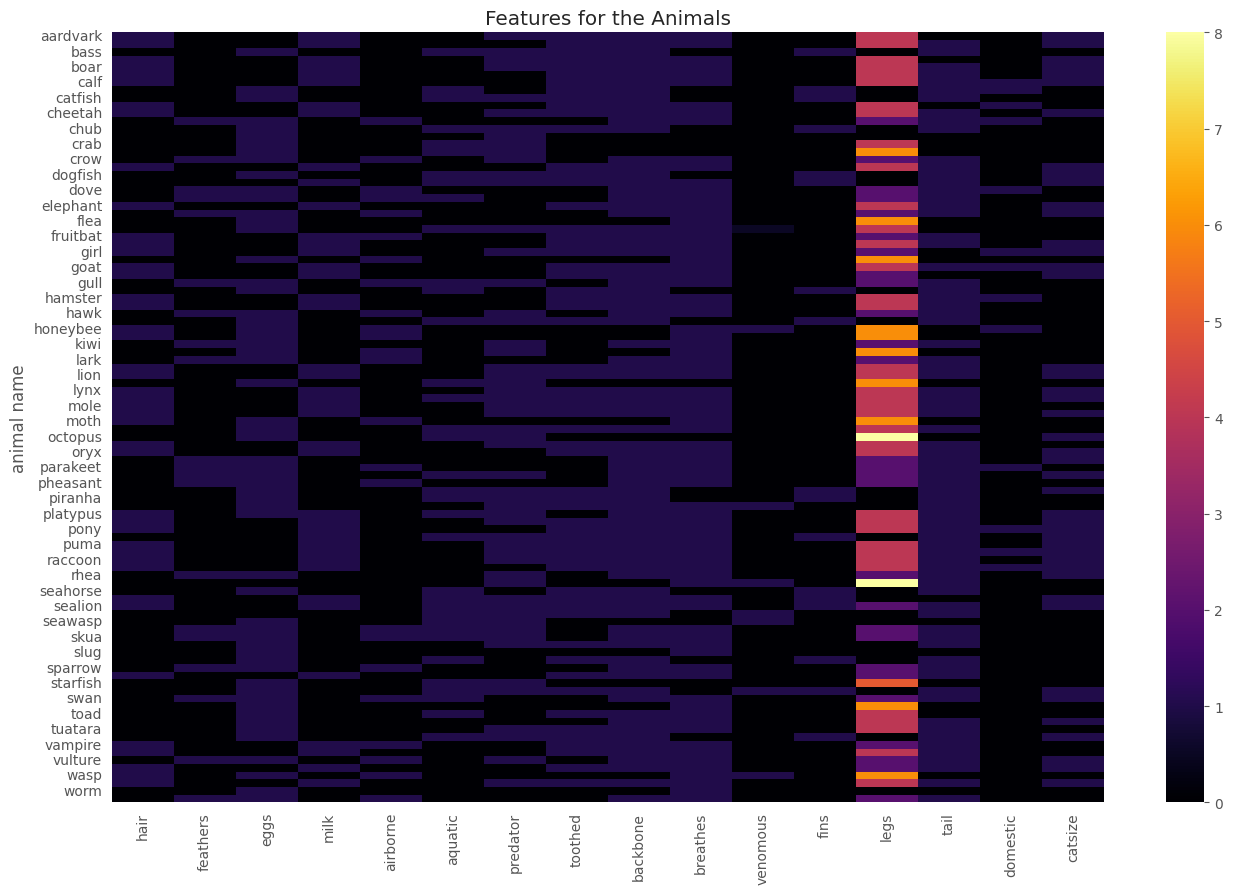

In [228]:
zoo_df_temp = zoo.drop(['type'], axis=1)
zoo_df_temp = zoo_df_temp.groupby(by='animal name').mean()
plt.rcParams['figure.figsize'] = (16,10)
sns.heatmap(zoo_df_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Features for the Animals")

In [229]:
zoo_df = zoo.copy()
zoo_df['has_legs'] = np.where(zoo_df['legs']>0,1,0)
zoo_df = zoo_df[['animal name','hair','feathers','eggs','milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes','venomous','fins','legs','has_legs','tail','domestic','catsize']]
zoo_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1


Text(0.5, 1.0, 'Features for the Animals')

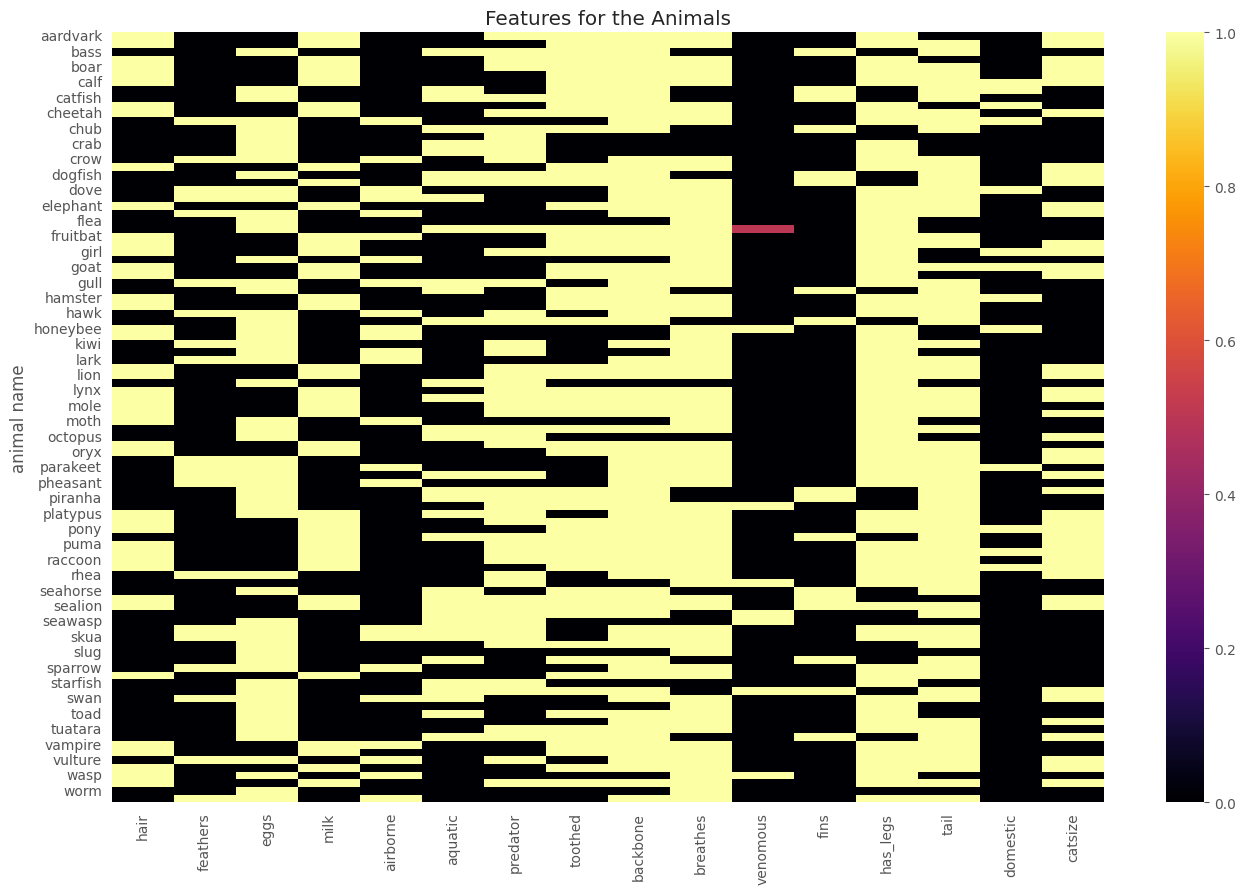

In [230]:
zoo_df_temp = zoo_df.drop(['legs'], axis=1)
zoo_df_temp = zoo_df_temp.groupby(by='animal name').mean()
plt.rcParams['figure.figsize'] = (16,10)
sns.heatmap(zoo_df_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Features for the Animals")

In [231]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

Text(0.5, 1.0, 'Histogram of Classes')

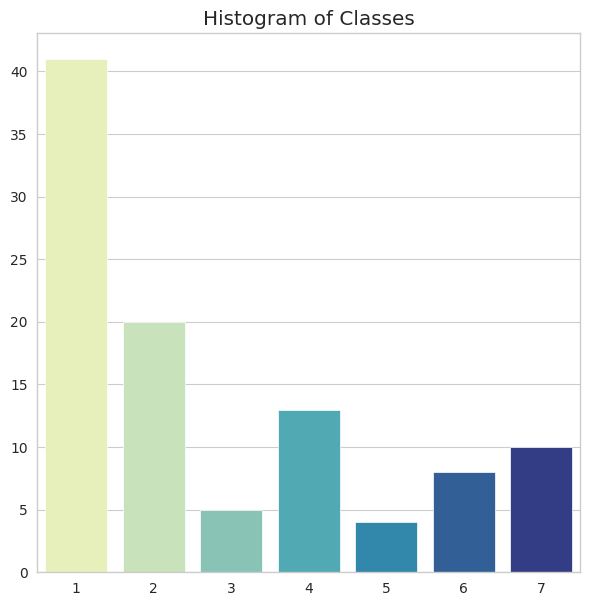

In [232]:
# Set default plot grid
sns.set_style('whitegrid')
# Plot histogram of classes
plt.rcParams['figure.figsize'] = (7,7)
ax = sns.barplot(x = zoo['type'].value_counts().index.tolist(), y = zoo['type'].value_counts().tolist(), palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Classes")

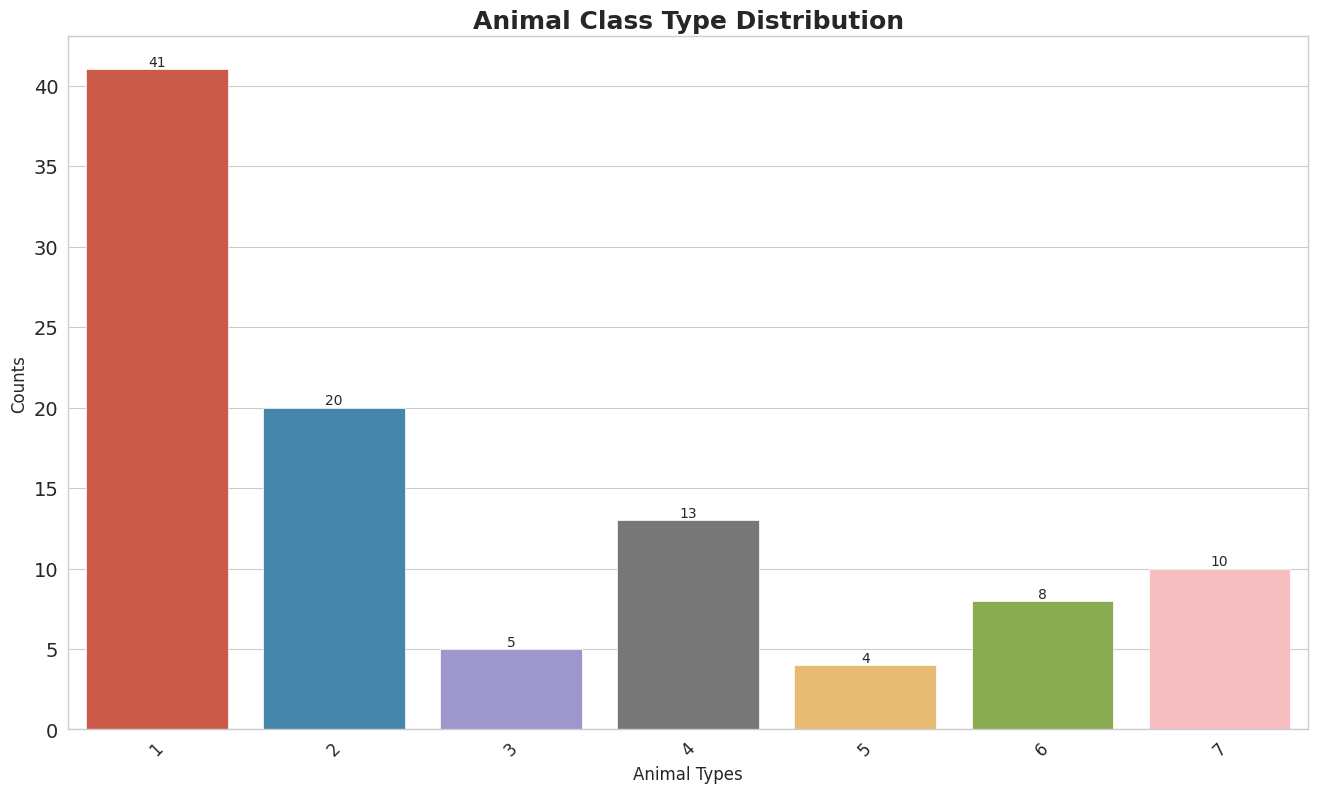

In [233]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = zoo['type'].value_counts().index.tolist(), y = zoo['type'].value_counts().tolist())
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Animal Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Animal Types')
plt.ylabel('Counts')
for i in ax.containers:
    ax.bar_label(i,)

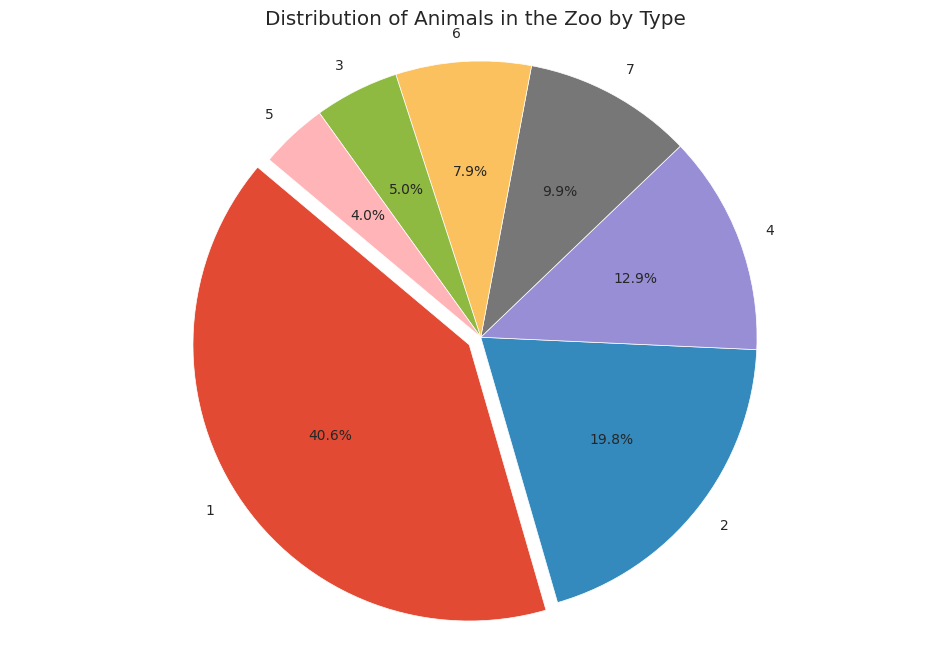

In [234]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Assuming zoo is your DataFrame
counts = zoo['type'].value_counts()
labels = counts.index
explode = [0.05] + [0] * (len(counts) - 1)  # Adding explode for the first slice

plt.pie(counts, labels=labels, explode=explode, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Animals in the Zoo by Type')

plt.show()


Text(0, 0.5, 'count')

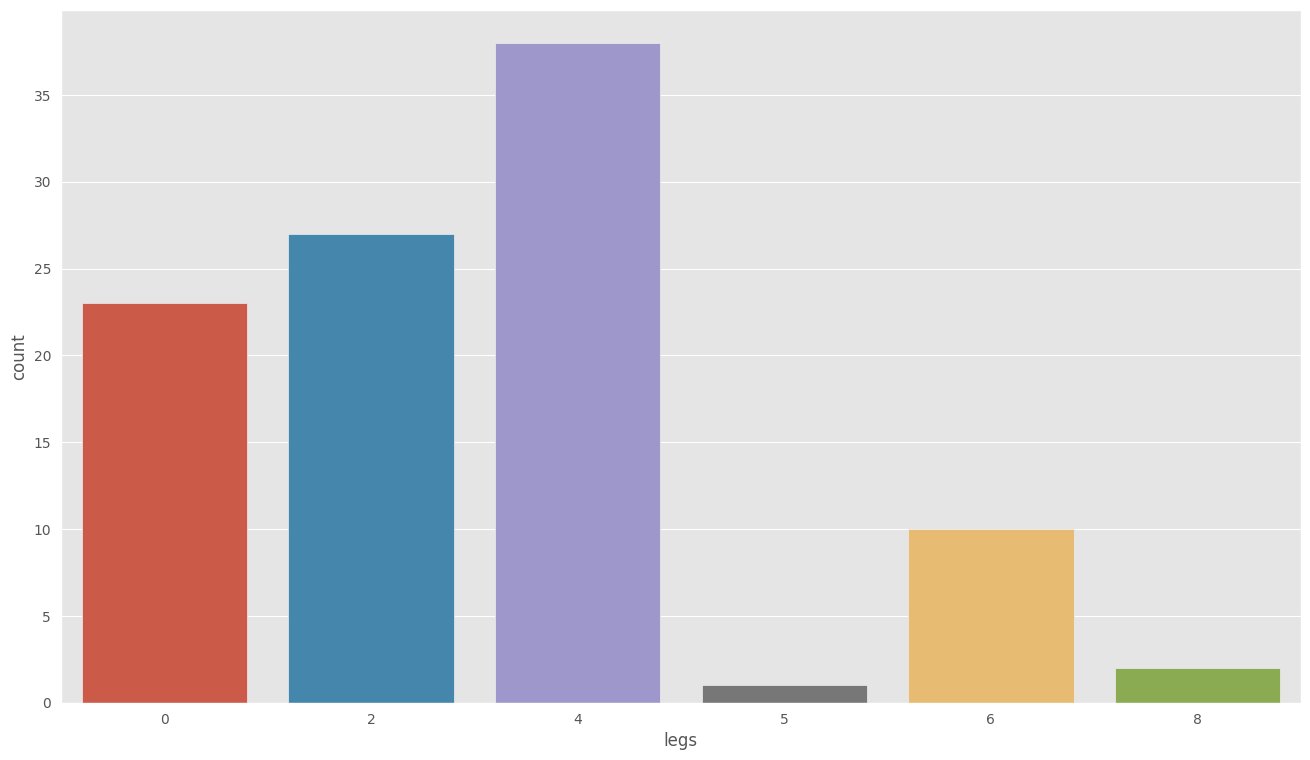

In [235]:
plt.style.use("ggplot")
plt.figure(figsize = (16,9))
ax = sns.barplot(x = zoo['legs'].value_counts().index.tolist(), y = zoo['legs'].value_counts().tolist())
plt.xlabel('legs')
plt.ylabel('count')


* Most of the animals have 4 legs
* Least number of animals have 5 legs

# **Test Train Split and Cross Validation methods**

In [251]:
x = zoo.drop('type',axis=1)
y = zoo[['type']]

In [252]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [253]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (70, 17)
Shape of X_test:  (31, 17)
Shape of y_train:  (70, 1)
Shape of y_test (31, 1)


# **Grid search for choosing the best Value of K**

In [254]:
#KNN
from sklearn.neighbors import KNeighborsClassifier as KNC

In [255]:
#to find best k value
acc=[]
for i in range(3,50,2):
    neigh=KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
    train_acc=np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
    test_acc=np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
    acc.append([train_acc,test_acc])

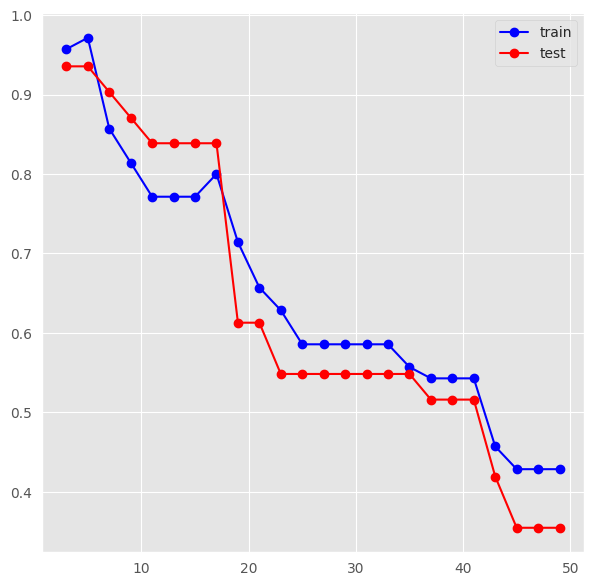

In [242]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'bo-')
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'ro-')
plt.legend(['train','test'])

In [256]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

# **KNN**

In [260]:
#from plots atk=5 we get best model
#model building at k=5
neigh=KNC(n_neighbors=5)
neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
train_acc=np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
test_acc=np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
print(train_acc)
print(test_acc)

0.9714285714285714
0.9354838709677419
